In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
%%bigquery customer_features --project fb-business-datasets
SELECT email, Days_Since_Last_Purchase, Total_Orders, Total_Products_Purchased, Total_Spend, Average_Order_Value, Unique_Skus, Average_Interval
, Day_Of_Week, Day, Hour, Most_Commonly_Used_Channel, Favorite_Holiday
FROM fb-business-datasets.ds_tables.customer_features_newest

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
customer_features.Average_Interval.describe()

,Average_Interval
count,132115.000000
mean,110.943956
std,103.342882
min,0.000000
25%,35.000000
50%,81.000000
75%,154.000000
max,581.000000


In [5]:
%%bigquery clv --project fb-business-datasets
SELECT email, Customer_Lifespan, clv1, Yearly_Order_Ratio, clv2, T_cal
FROM fb-business-datasets.ds_tables.clv_newest

Query is running:   0%|          |

Downloading:   0%|          |

In [6]:
customer_features = customer_features.merge(clv, on='email', how='inner')
customer_features.columns

Index(['email', 'Days_Since_Last_Purchase', 'Total_Orders',
       'Total_Products_Purchased', 'Total_Spend', 'Average_Order_Value',
       'Unique_Skus', 'Average_Interval', 'Day_Of_Week', 'Day', 'Hour',
       'Most_Commonly_Used_Channel', 'Favorite_Holiday', 'Customer_Lifespan',
       'clv1', 'Yearly_Order_Ratio', 'clv2', 'T_cal'],
      dtype='object')

In [7]:
customer_features.loc[customer_features['Average_Interval'].isnull(), 'Average_Interval'] = customer_features.loc[customer_features['Average_Interval'].isnull(), 'T_cal']
customer_features.drop('T_cal', axis=1, inplace=True)

In [8]:
customer_features.Most_Commonly_Used_Channel.unique()

array(['Facebook(PS)', 'Affiliate', 'Unknown', 'Klaviyo(E)',
       'Instagram(Other)', 'Paid Social', 'Email', 'Bing(PSH)', 'Display',
       'Text', 'Attentive(T)', 'Organic & Social', 'Other', 'Paid Search'],
      dtype=object)

In [9]:
customer_features['Churn'] = np.where(customer_features['Days_Since_Last_Purchase'] > 153, True, False)
customer_features = customer_features.drop(['Days_Since_Last_Purchase', 'Day_Of_Week', 'Day', 'Hour', 'Favorite_Holiday'], axis=1)

In [10]:
print ("Churn Percentage = " + str(customer_features['Churn'].mean() * 100))

Churn Percentage = 68.1537473761402


In [11]:
customer_features['Most_Commonly_Used_Channel'] = pd.Categorical(customer_features['Most_Commonly_Used_Channel'],
                                                                 categories=['Unknown', 'Facebook(PS)', 'Klaviyo(E)', 'Attentive(T)', 'Email',
                                                                             'Instagram(Other)', 'Affiliate', 'Text', 'Paid Social', 'Bing(PSH)',
                                                                             'Other', 'Organic & Social', 'Display', 'Paid Search'])
customer_features = pd.get_dummies(customer_features, columns=['Most_Commonly_Used_Channel'], drop_first=True)
customer_features.head(2)

,email,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Customer_Lifespan,clv1,Yearly_Order_Ratio,...,Most_Commonly_Used_Channel_Email,Most_Commonly_Used_Channel_Instagram(Other),Most_Commonly_Used_Channel_Affiliate,Most_Commonly_Used_Channel_Text,Most_Commonly_Used_Channel_Paid Social,Most_Commonly_Used_Channel_Bing(PSH),Most_Commonly_Used_Channel_Other,Most_Commonly_Used_Channel_Organic & Social,Most_Commonly_Used_Channel_Display,Most_Commonly_Used_Channel_Paid Search
0,mp_adams@mac.com,2,2,24.0,12.0,1,67.0,0.002740,0.032877,0.083333,...,False,False,False,False,False,False,False,False,False,False
1,karen.mcadams40@gmail.com,3,3,51.0,17.0,2,178.0,0.126027,4.789041,0.083333,...,False,False,False,False,False,False,False,False,False,False


In [12]:
customer_features.describe()

,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Customer_Lifespan,clv1,Yearly_Order_Ratio,clv2
count,624557.0,624557.0,624557.000000,624557.000000,624557.0,624557.000000,624557.000000,624557.000000,624557.000000,624557.000000
mean,1.374136,2.763948,67.686674,46.899938,2.353276,238.337358,0.099114,18.600678,0.086990,4.511161
std,1.018326,4.880048,106.023965,30.597336,2.062367,166.685064,0.258764,105.274013,0.016694,3.612691
min,1.0,1.0,1.000000,1.000000,1.0,0.000000,0.002740,0.002740,0.083333,0.090909
25%,1.0,1.0,26.000000,26.000000,1.0,81.000000,0.002740,0.071233,0.083333,2.363636
50%,1.0,2.0,49.800000,39.826667,2.0,220.000000,0.002740,0.136986,0.083333,3.748837
75%,1.0,3.0,76.000000,60.500000,3.0,368.000000,0.002740,0.260822,0.083333,5.672727
max,105.0,2121.0,43329.750000,2963.200000,54.0,581.000000,1.586301,39649.689041,0.750000,1111.019231


In [13]:
customer_features[customer_features['Churn'] == True].describe()

,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Customer_Lifespan,clv1,Yearly_Order_Ratio,clv2
count,425659.0,425659.0,425659.000000,425659.000000,425659.0,425659.000000,425659.000000,425659.000000,425659.000000,425659.000000
mean,1.222911,2.365741,57.013914,45.417028,2.114911,310.046421,0.051813,7.369500,0.086089,4.308664
std,0.640561,2.782574,60.523173,30.591476,1.676501,146.026176,0.156876,36.294526,0.014958,3.221156
min,1.0,1.0,1.000000,1.000000,1.0,0.000000,0.002740,0.002740,0.083333,0.090909
25%,1.0,1.0,26.000000,25.600000,1.0,199.000000,0.002740,0.071233,0.083333,2.363636
50%,1.0,2.0,42.120000,37.000000,2.0,325.000000,0.002740,0.118356,0.083333,3.490909
75%,1.0,3.0,67.200000,58.400000,3.0,419.000000,0.002740,0.206027,0.083333,5.420909
max,30.0,668.0,10727.000000,2963.200000,35.0,578.000000,1.186301,5965.975342,0.750000,357.566667


In [14]:
customer_features[customer_features['Churn'] == False].describe()

,Total_Orders,Total_Products_Purchased,Total_Spend,Average_Order_Value,Unique_Skus,Average_Interval,Customer_Lifespan,clv1,Yearly_Order_Ratio,clv2
count,198898.0,198898.0,198898.000000,198898.000000,198898.0,198898.000000,198898.000000,198898.000000,198898.000000,198898.000000
mean,1.69777,3.616145,90.527308,50.073494,2.863397,84.873733,0.200342,42.636375,0.088917,4.944522
std,1.491457,7.559449,163.380983,30.367605,2.638005,83.985878,0.377564,176.447459,0.019769,4.301426
min,1.0,1.0,8.000000,8.000000,1.0,0.000000,0.002740,0.021918,0.083333,0.727273
25%,1.0,1.0,28.000000,26.000000,1.0,29.000000,0.002740,0.076712,0.083333,2.454545
50%,1.0,2.0,57.000000,44.800000,2.0,60.000000,0.002740,0.169863,0.083333,4.436364
75%,2.0,4.0,100.000000,65.150000,3.0,117.000000,0.189041,18.750685,0.083333,6.272727
max,105.0,2121.0,43329.750000,1136.000000,54.0,581.000000,1.586301,39649.689041,0.729167,1111.019231


In [15]:
customer_features.columns

Index(['email', 'Total_Orders', 'Total_Products_Purchased', 'Total_Spend',
       'Average_Order_Value', 'Unique_Skus', 'Average_Interval',
       'Customer_Lifespan', 'clv1', 'Yearly_Order_Ratio', 'clv2', 'Churn',
       'Most_Commonly_Used_Channel_Facebook(PS)',
       'Most_Commonly_Used_Channel_Klaviyo(E)',
       'Most_Commonly_Used_Channel_Attentive(T)',
       'Most_Commonly_Used_Channel_Email',
       'Most_Commonly_Used_Channel_Instagram(Other)',
       'Most_Commonly_Used_Channel_Affiliate',
       'Most_Commonly_Used_Channel_Text',
       'Most_Commonly_Used_Channel_Paid Social',
       'Most_Commonly_Used_Channel_Bing(PSH)',
       'Most_Commonly_Used_Channel_Other',
       'Most_Commonly_Used_Channel_Organic & Social',
       'Most_Commonly_Used_Channel_Display',
       'Most_Commonly_Used_Channel_Paid Search'],
      dtype='object')

In [16]:
customer_features.columns
customers_numeric = customer_features.iloc[:, 1:11]

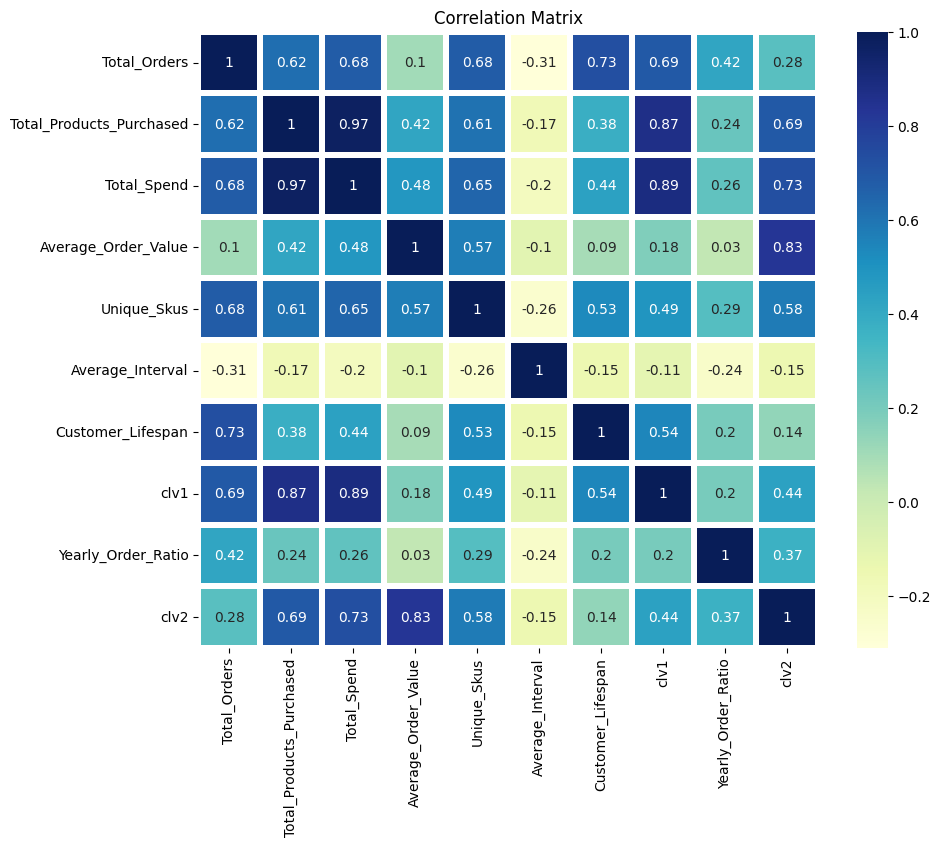

In [17]:
# Calculate the correlation matrix
corr = customers_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(round(corr,2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all values are numeric and coerce non-numeric to NaN
customers_numeric = customer_features.select_dtypes(include=[np.number])
customers_numeric = customers_numeric.apply(pd.to_numeric, errors='coerce')

# Convert all columns to float64 to ensure consistency
customers_numeric = customers_numeric.astype(np.float64)

# Verify that there are no non-finite values in the data
if not np.isfinite(customers_numeric.values).all():
    raise ValueError("Non-finite values found in the dataset")

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = customers_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(customers_numeric.values, i) for i in range(len(customers_numeric.columns))]

print(vif_data)

                    feature        VIF
0              Total_Orders  21.200929
1  Total_Products_Purchased  23.248518
2               Total_Spend  65.656716
3       Average_Order_Value  15.694390
4               Unique_Skus   8.629268
5          Average_Interval   3.157750
6         Customer_Lifespan   3.207103
7                      clv1  12.226485
8        Yearly_Order_Ratio  18.079581
9                      clv2  26.729027


In [19]:
customers_numeric = customers_numeric.drop(['Total_Spend','Total_Orders','clv2'], axis=1)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = customers_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(customers_numeric.values, i) for i in range(len(customers_numeric.columns))]

print(vif_data)

                    feature       VIF
0  Total_Products_Purchased  9.209943
1       Average_Order_Value  5.735528
2               Unique_Skus  6.604373
3          Average_Interval  2.782429
4         Customer_Lifespan  2.372351
5                      clv1  6.772260
6        Yearly_Order_Ratio  5.444887


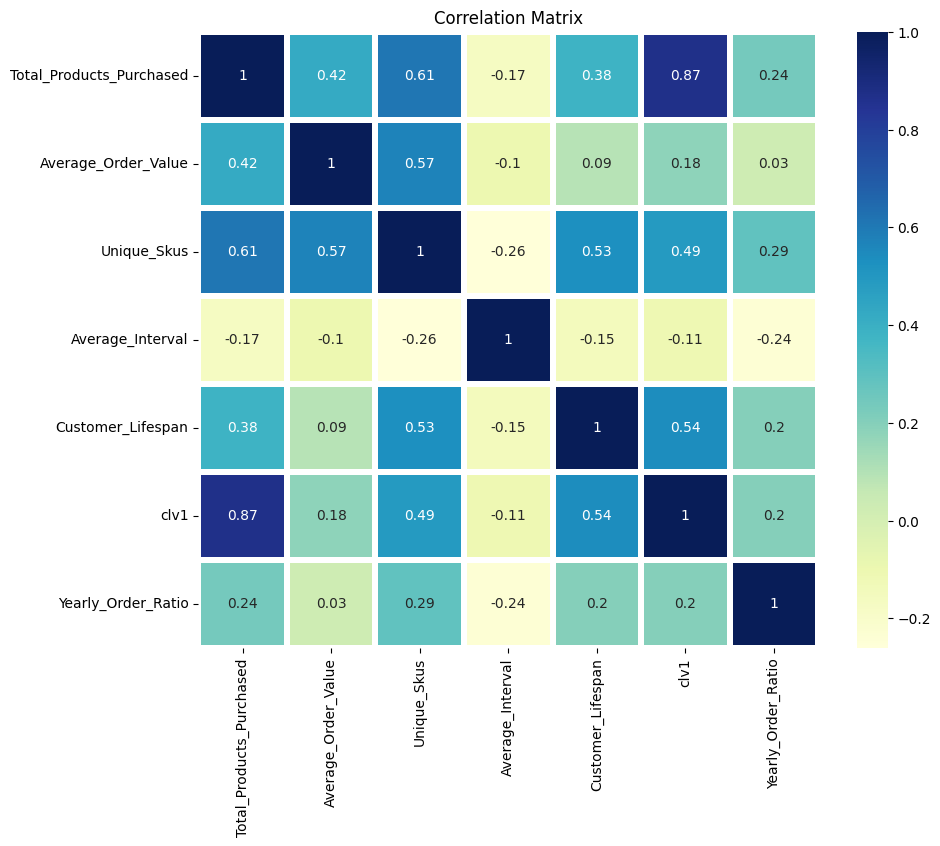

In [20]:
# Calculate the correlation matrix
corr = customers_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(round(corr,2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Drop variables to reduce multicollinearity
customer_features = customer_features.drop(['email','Total_Spend','Total_Orders','clv2'], axis=1)
# Transfer all boolean variables to integers
customer_features[customer_features.select_dtypes(include=[np.bool_]).columns] = customer_features.select_dtypes(include=[np.bool_]).astype(int)

In [22]:
# Ensure all values are numeric and coerce non-numeric to NaN
customer_features = customer_features.select_dtypes(include=[np.number])
customer_features = customer_features.apply(pd.to_numeric, errors='coerce')

# Convert all columns to float64 to ensure consistency
customer_features = customer_features.astype(np.float64)

# Verify that there are no non-finite values in the data
if not np.isfinite(customer_features.values).all():
    raise ValueError("Non-finite values found in the dataset")

In [23]:
customer_features.head(2)

,Total_Products_Purchased,Average_Order_Value,Unique_Skus,Average_Interval,Customer_Lifespan,clv1,Yearly_Order_Ratio,Churn,Most_Commonly_Used_Channel_Facebook(PS),Most_Commonly_Used_Channel_Klaviyo(E),...,Most_Commonly_Used_Channel_Email,Most_Commonly_Used_Channel_Instagram(Other),Most_Commonly_Used_Channel_Affiliate,Most_Commonly_Used_Channel_Text,Most_Commonly_Used_Channel_Paid Social,Most_Commonly_Used_Channel_Bing(PSH),Most_Commonly_Used_Channel_Other,Most_Commonly_Used_Channel_Organic & Social,Most_Commonly_Used_Channel_Display,Most_Commonly_Used_Channel_Paid Search
0,2.0,12.0,1.0,67.0,0.002740,0.032877,0.083333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,17.0,2.0,178.0,0.126027,4.789041,0.083333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

In [25]:
X = customer_features.drop(columns=['Churn'])
y = customer_features['Churn']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.shape)
print(y_train_smote.shape)

(499645,)
(680934,)


In [27]:
print(y_train.sum()/y_train.count())
print(y_train_smote.sum()/y_train_smote.count())

0.6814178066427163
0.5


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

## KNN

In [ ]:
# knn_model = KNeighborsClassifier(n_neighbors = np.sqrt(y_train_smote.shape[0]).astype(int))
# knn_model.fit(X_train_scaled,y_train_smote)
# predicted_y = knn_model.predict(X_test_scaled)
# accuracy_knn = knn_model.score(X_test_scaled,y_test)
# print("KNN accuracy:",accuracy_knn)

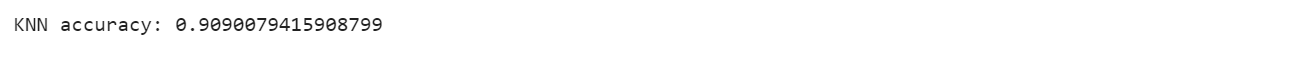

In [ ]:
# print(classification_report(y_test, predicted_y))

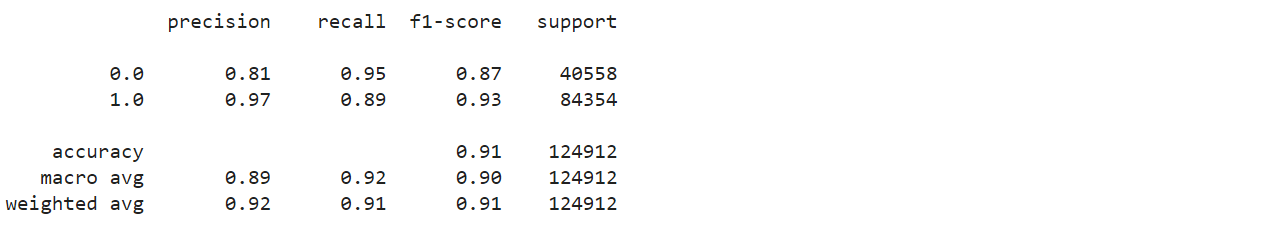

## SVC

In [ ]:
# svc_model = SVC(random_state = 1)
# svc_model.fit(X_train_scaled,y_train_smote)
# predict_y = svc_model.predict(X_test_scaled)
# accuracy_svc = svc_model.score(X_test_scaled,y_test)
# print("SVM accuracy is :",accuracy_svc)

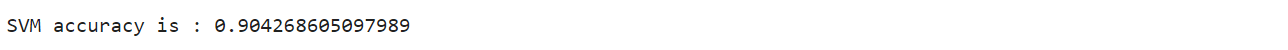

In [ ]:
# print(classification_report(y_test, predict_y))

## Random Forest

In [29]:
X_train_smote.shape

(680934, 20)

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Make predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9257477263993852


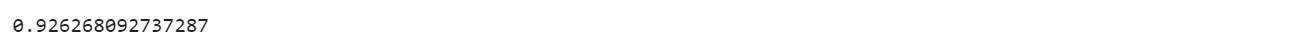

In [31]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88     39720
         1.0       0.95      0.94      0.95     85192

    accuracy                           0.93    124912
   macro avg       0.91      0.92      0.91    124912
weighted avg       0.93      0.93      0.93    124912



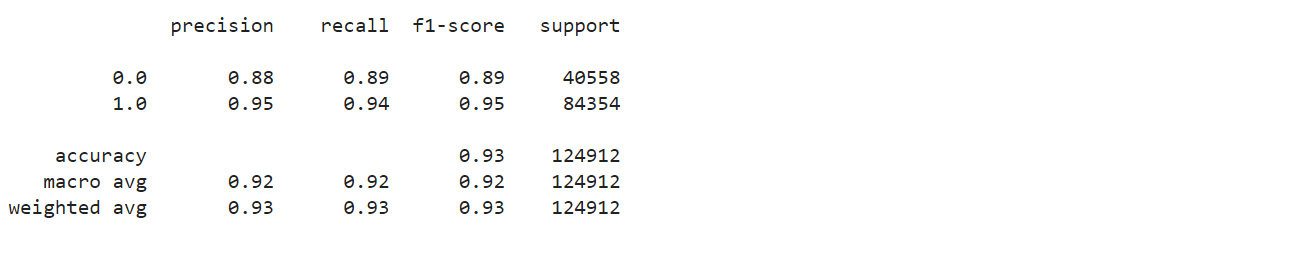

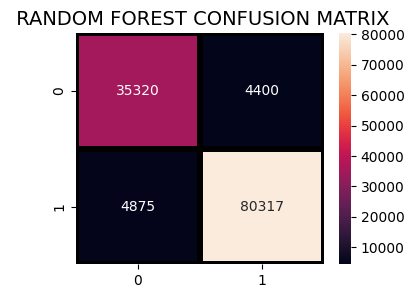

In [32]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

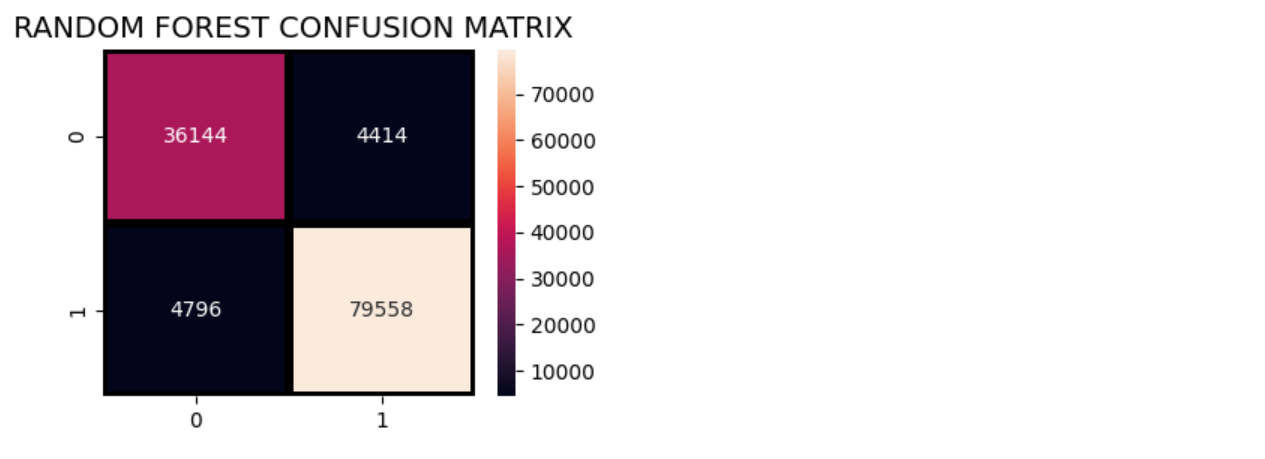

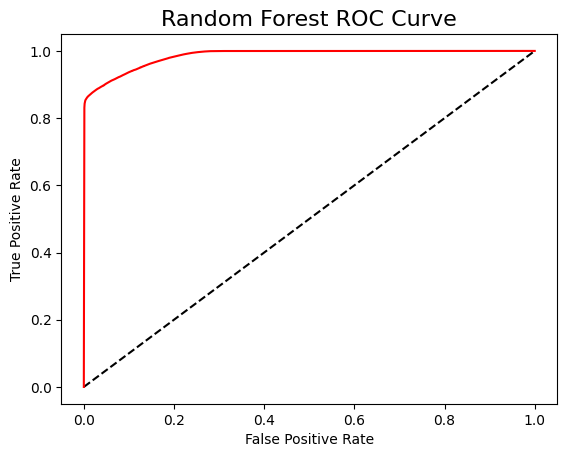

In [33]:
y_rfpred_prob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

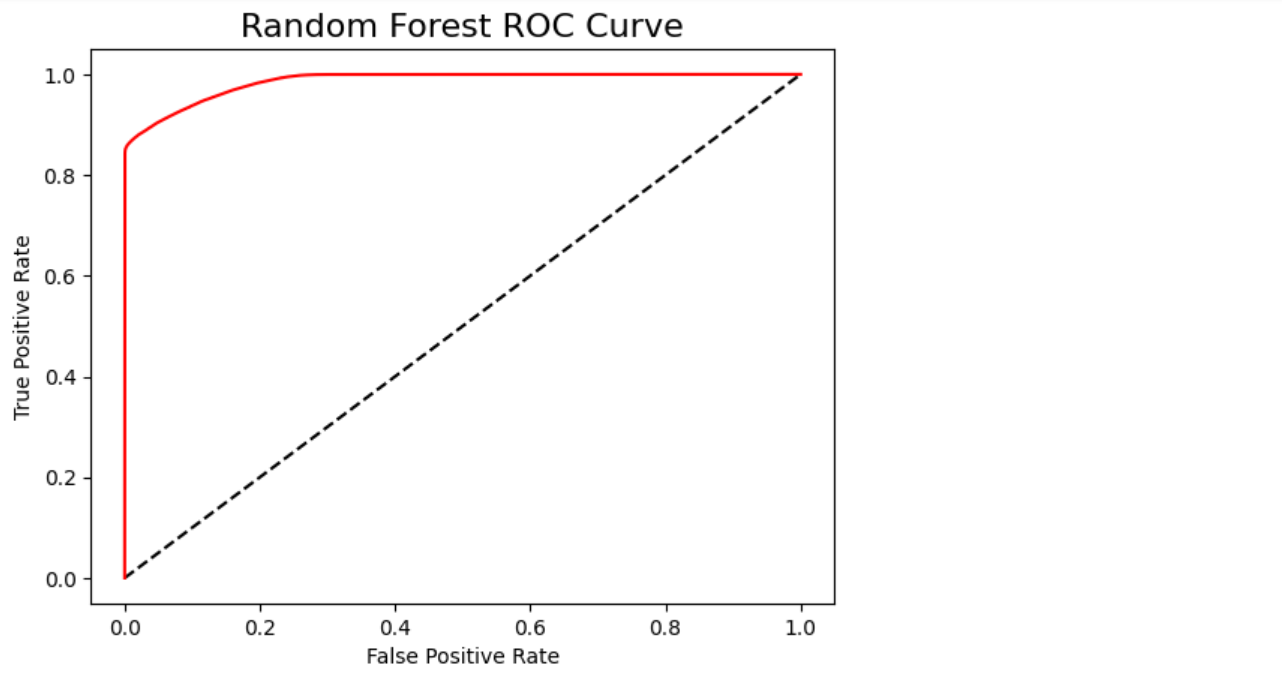

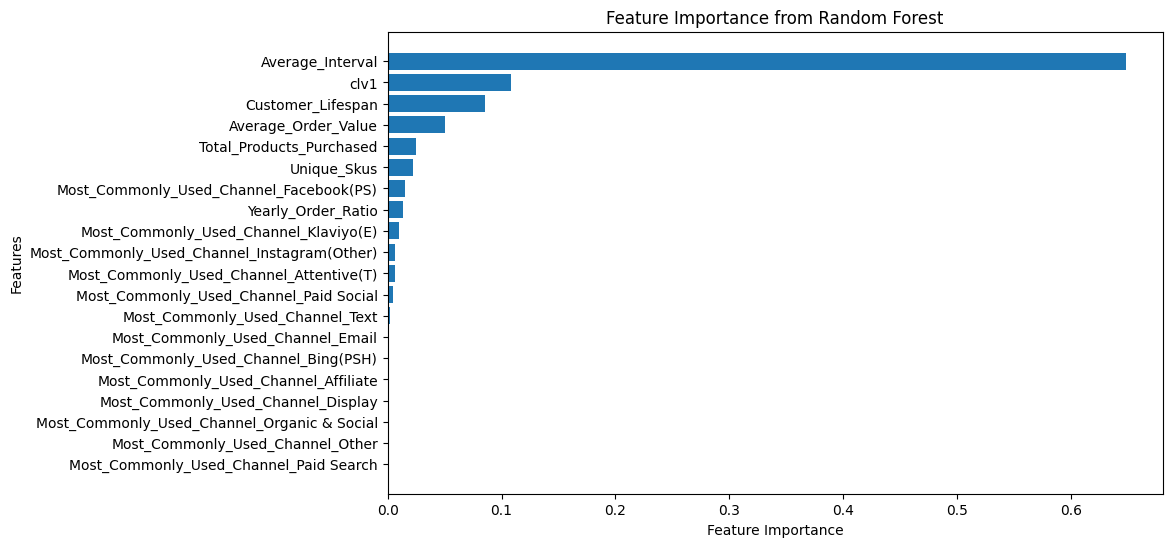

In [34]:
# Get feature importance
feature_importances = rf.feature_importances_
features = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


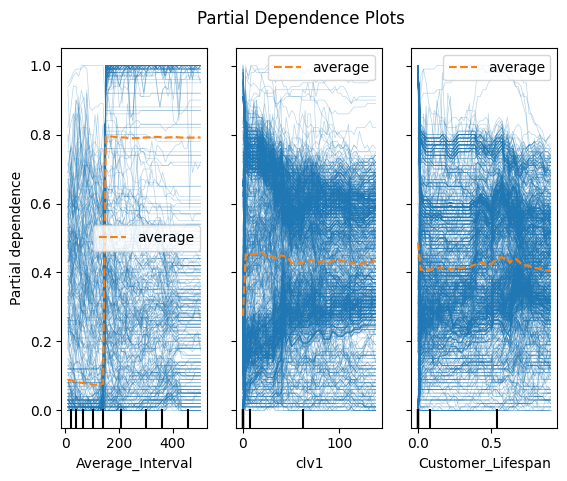

In [60]:
# !pip install scikit-learn --upgrade # Upgrade scikit-learn to the latest version
# from sklearn.inspection import PartialDependenceDisplay

# # Plot partial dependence for the top 3 important features
# top_features = importance_df['Feature'].head(3).tolist()

# display = PartialDependenceDisplay.from_estimator(rf, X_train_smote, top_features, kind="both", grid_resolution=50)
# display.figure_.suptitle('Partial Dependence Plots')
# display.figure_.subplots_adjust(top=0.9)  # Adjust title position
# plt.show()

In [ ]:
!pip install shap
import shap

# Create the explainer object
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_smote)

# Summary plot
shap.summary_plot(shap_values[1], X_train_smote)

# SHAP value plot for a single instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train_smote.iloc[0,:])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  # Replace y_test with your test data

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
shap.dependence_plot("Feature1", shap_values[1], X_train_smote)

## Logistic Regression

In [ ]:
# lr_model = LogisticRegression()
# lr_model.fit(X_train_scaled,y_train_smote)
# accuracy_lr = lr_model.score(X_test_scaled,y_test)
# print("Logistic Regression accuracy is :",accuracy_lr)

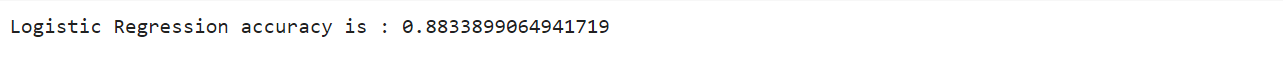

In [ ]:
# lr_pred= lr_model.predict(X_test_scaled)
# report = classification_report(y_test,lr_pred)
# print(report)

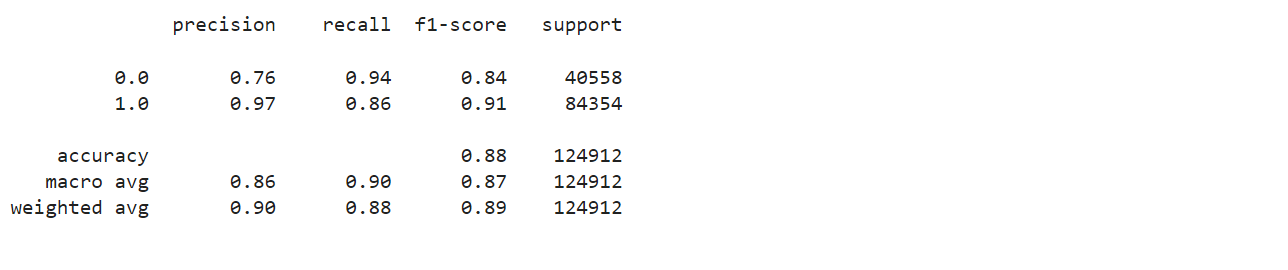

In [ ]:
# plt.figure(figsize=(4,3))
# sns.heatmap(confusion_matrix(y_test, lr_pred),
#                 annot=True,fmt = "d",linecolor="k",linewidths=3)

# plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
# plt.show()

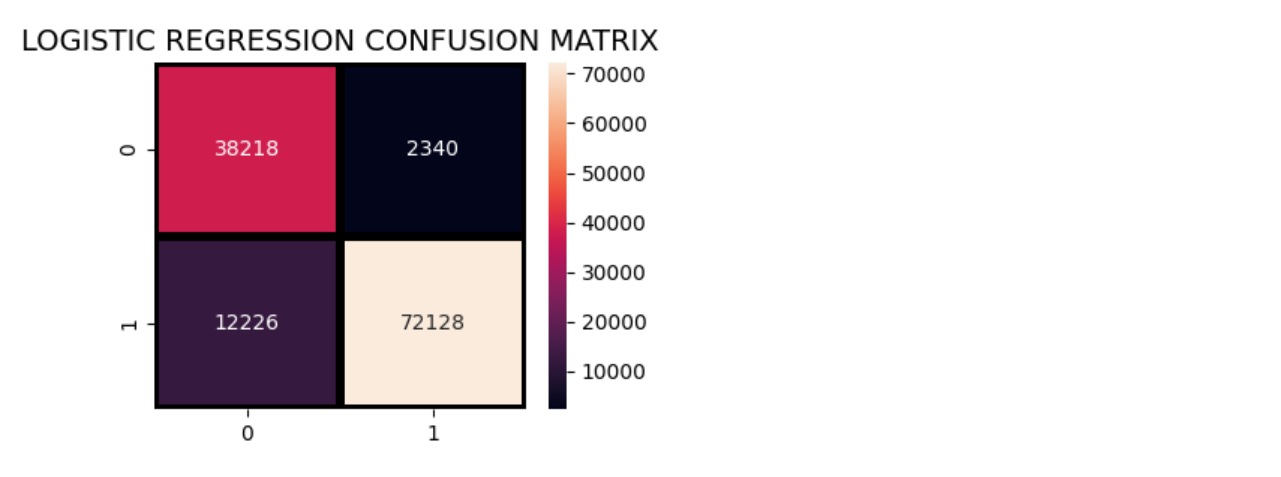

In [ ]:
# y_pred_prob = lr_model.predict_proba(X_test_scaled)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.plot([0, 1], [0, 1], 'k--' )
# plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve',fontsize=16)
# plt.show()

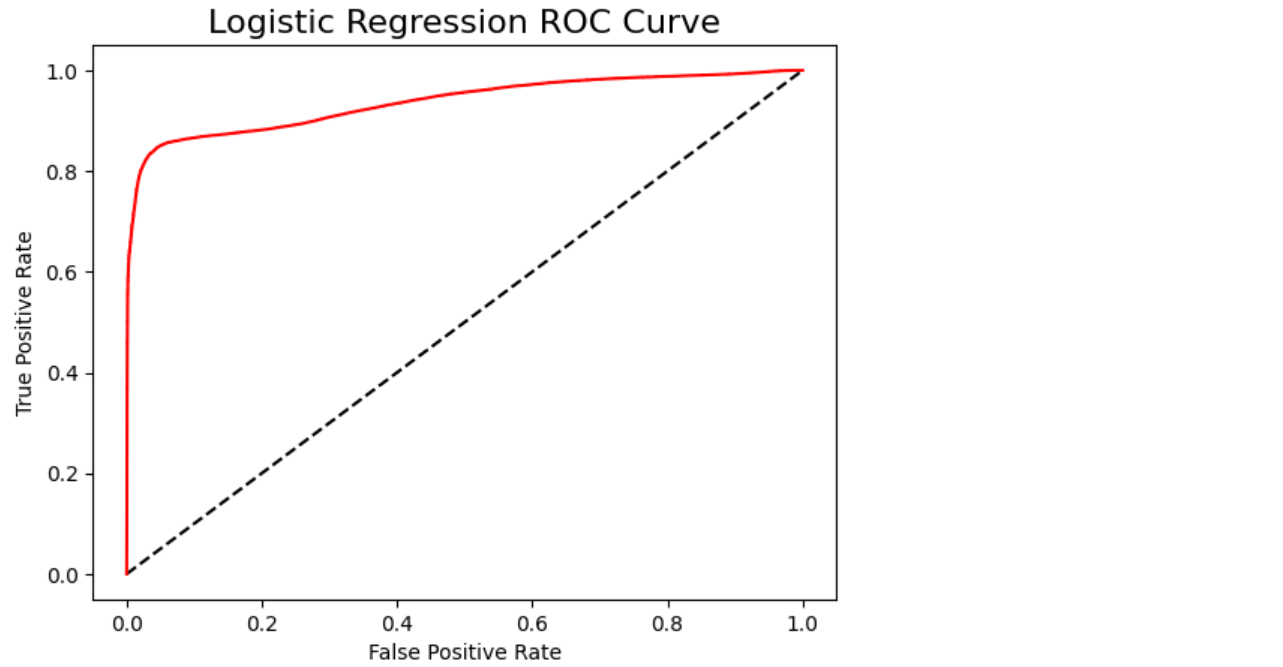

## Decision Tree

In [ ]:
# dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train_smote,y_train_smote)
# predictdt_y = dt_model.predict(X_test)
# accuracy_dt = dt_model.score(X_test,y_test)
# print("Decision Tree accuracy is :",accuracy_dt)

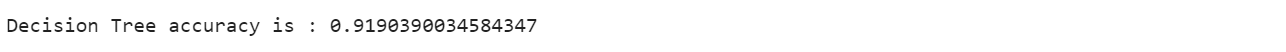

In [ ]:
# print(classification_report(y_test, predictdt_y))

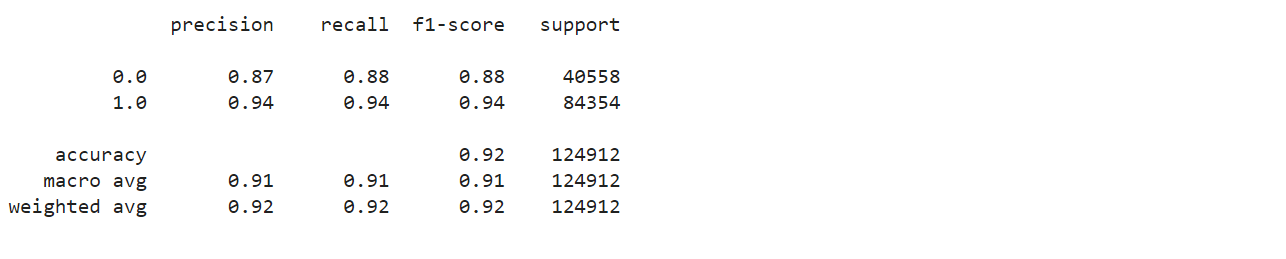

## AdaBoost Classifier

In [ ]:
# a_model = AdaBoostClassifier()
# a_model.fit(X_train_smote,y_train_smote)
# a_preds = a_model.predict(X_test)
# print("AdaBoost Classifier accuracy")
# metrics.accuracy_score(y_test, a_preds)

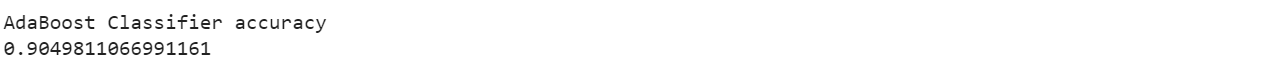

In [ ]:
# print(classification_report(y_test, a_preds))

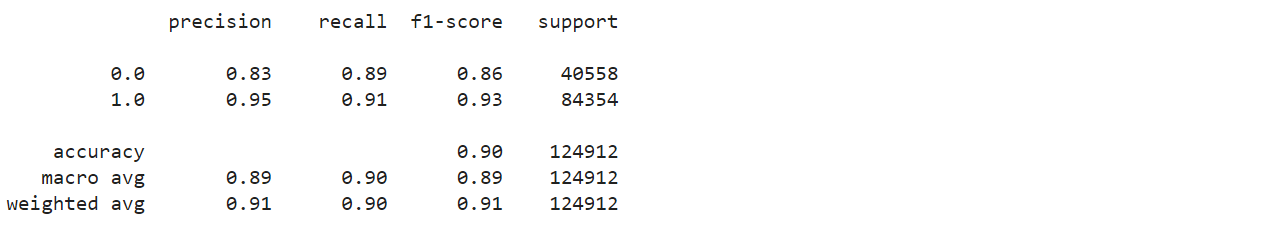

In [ ]:
# plt.figure(figsize=(4,3))
# sns.heatmap(confusion_matrix(y_test, a_preds), annot=True,fmt = "d",linecolor="k",linewidths=3)

# plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
# plt.show()

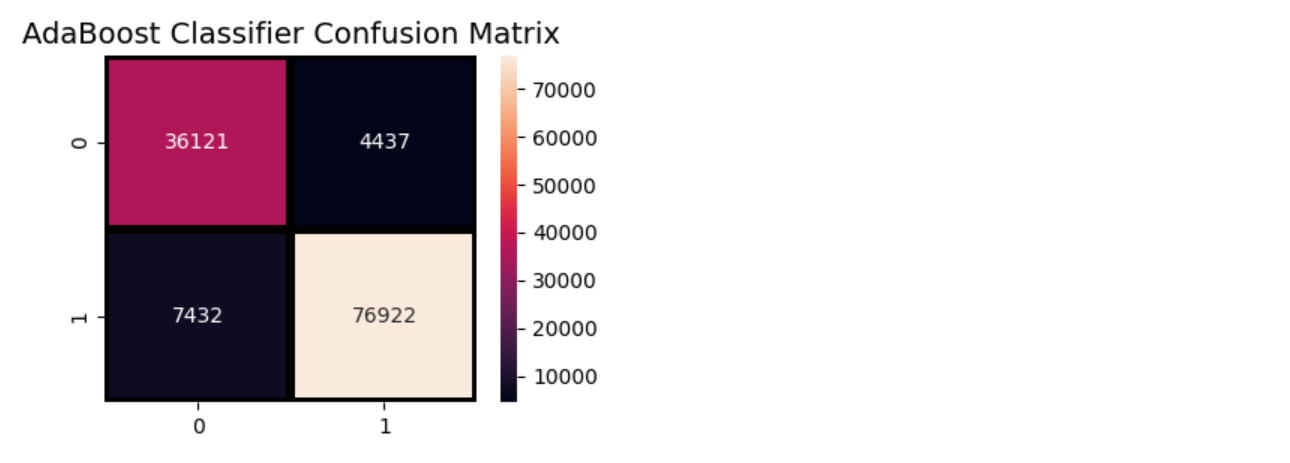

## Gradient Boosting Classifier

In [ ]:
# gb = GradientBoostingClassifier()
# gb.fit(X_train_smote, y_train_smote)
# gb_pred = gb.predict(X_test)
# print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

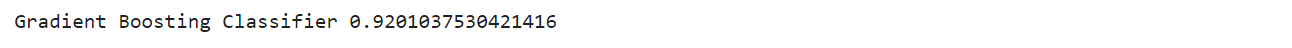

In [ ]:
# print(classification_report(y_test, gb_pred))

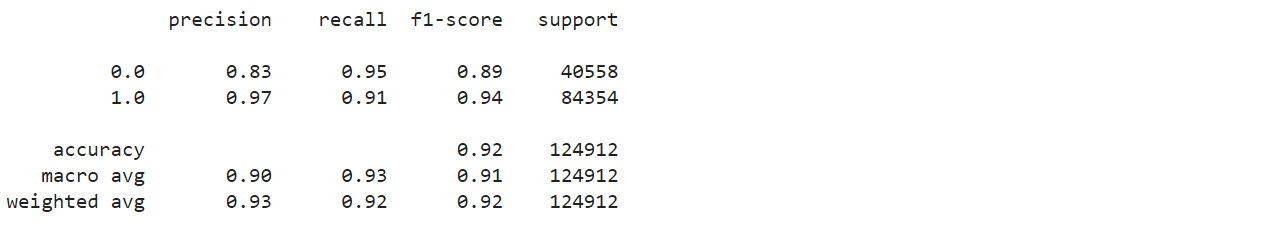

In [ ]:
# plt.figure(figsize=(4,3))
# sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True,fmt = "d",linecolor="k",linewidths=3)

# plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
# plt.show()

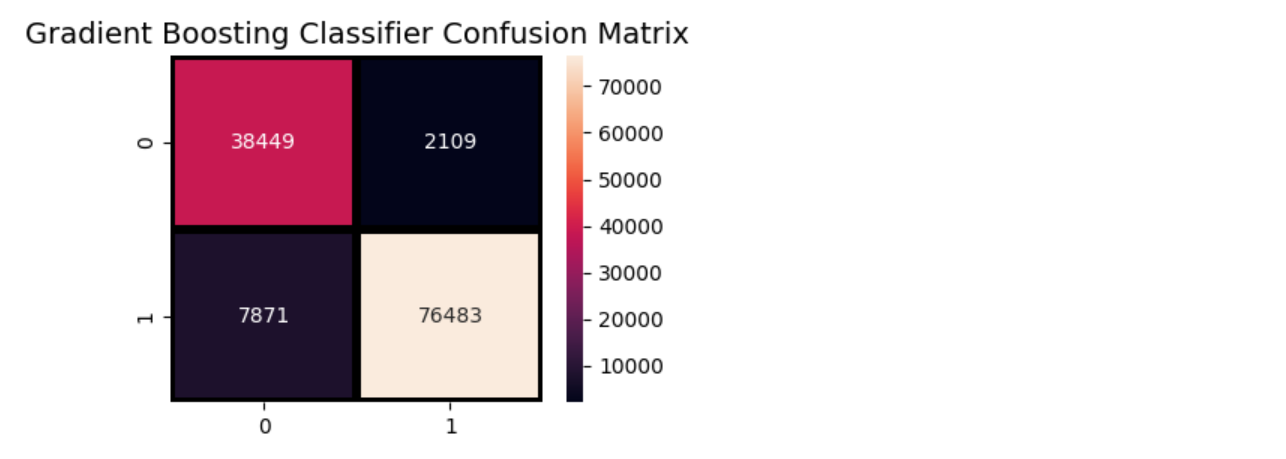

## Voting Classifier

In [ ]:
# from sklearn.ensemble import VotingClassifier
# clf1 = GradientBoostingClassifier()
# clf2 = LogisticRegression()
# clf3 = AdaBoostClassifier()
# eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
# eclf1.fit(X_train_smote, y_train_smote)
# predictions = eclf1.predict(X_test)
# print("Final Accuracy Score ")
# print(accuracy_score(y_test, predictions))

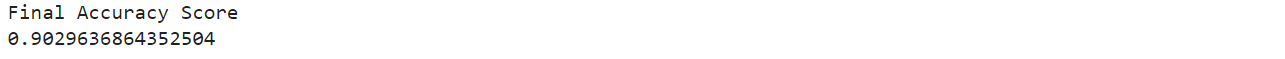

In [ ]:
# print(classification_report(y_test, predictions))

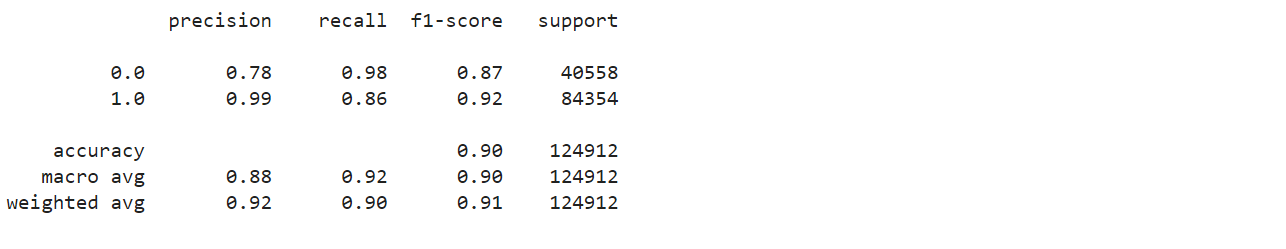

In [ ]:
# plt.figure(figsize=(4,3))
# sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt = "d",linecolor="k",linewidths=3)

# plt.title("FINAL CONFUSION MATRIX",fontsize=14)
# plt.show()

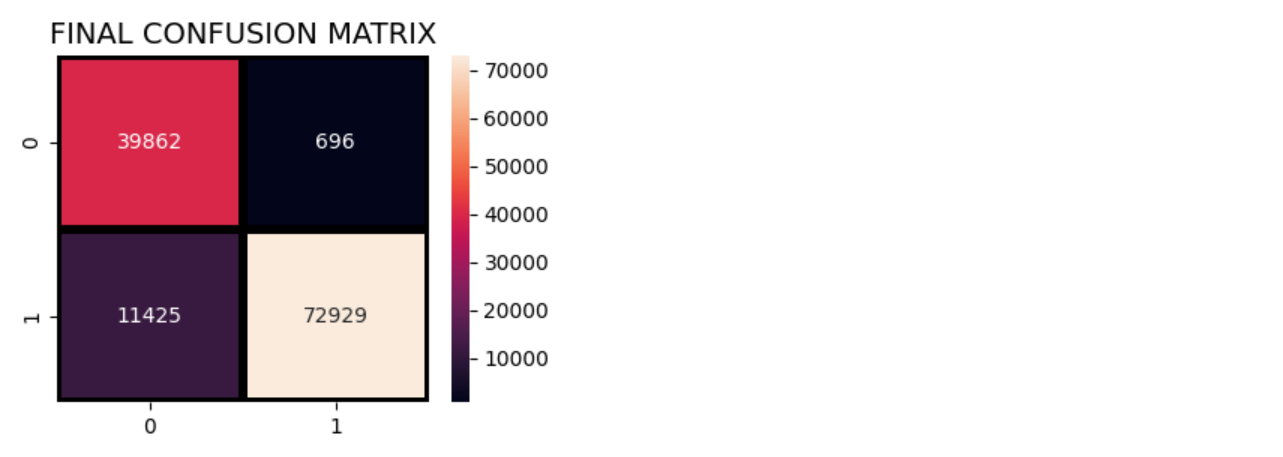